# Додаткові завдання №2

## 1 Візуалізація емпіричної імовірності
Побудуйте графік залежності емпіричної імовірності випадіння герба (HEAD) від кількості підкидань чесної монети (симуляцій).

**Зауваження.** Завдання передбачає використання бібліотеки [Matplotlib](https://matplotlib.org/).

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


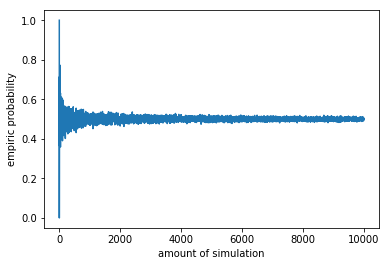

In [15]:
# Місце для Вашого коду

import matplotlib.pyplot as plt
import numpy as np


def simulation(n):
    count = [np.random.randint(0, 2) for _ in range(n)].count(1)
    return count / n

             
x_array = np.arange(0, 10000, 1)
y_array = np.array(list(map(simulation, x_array)))

plt.plot(x_array, y_array)
plt.xlabel('amount of simulation')
plt.ylabel('empiric probability')
plt.show()


## 2 Найбільше число
Реалізуйте функцію підрахунку точної (теоретичної) імовірності того, що максимальне число після $n$ кидків різних гральних кубиків із кількістю сторін $f = \{ f_i \}_{i = 1}^{n}$ дорівнює $x\_max$, для таких параметрів:
- $f = \{ 2, 5, 8 \}, x\_max = 8$
- $f = \{ 3, 4 \}, x\_max = 2$
- $f = \{ 2, 5, 7, 3 \}, x\_max = 3$

Тобто, якщо $X_i, i = 1, \ldots, n$, - число на $i$-му кидку кубика, а $X = \max\limits_{1 \leq i \leq n} X_i$, то потрібно знайти ймовірність $\textbf{P} \left( X = x\_max \right)$.

Підрахуйте також емпіричні ймовірності відповідних подій у випадку $10000$ симуляцій.

**Зауваження.** Якщо введені параметри не мають сенсу, то повертати $0$.
Наприклад, якщо при $f = \{ 4, 8, 3 \}$ вводиться $x\_max < 1$ або $x\_max > 8$.

In [22]:
# Місце для Вашого коду
from itertools import product

SIMULATIONS = 10000


def teoretical(f, x_max):
    if not (1 <= x_max <= max(f)):
        return 0
    
    count = 0
    n = 0
    for el in product(*map(lambda n: range(1, n+1), f)):
        n += 1
        if max(el) == x_max:
            count += 1
    return count / n
   
    
def empiric(f, x_max):
    if not (1 <= x_max <= max(f)):
        return 0
    
    def generate():
        """ Additional function that generates result of the stochastic experiment
        """
        return [np.random.choice(range(1, n+1)) for n in f]
    
    # a little bit of simple code)
    count = len(list(filter(bool, [max(generate()) == x_max for _ in range(SIMULATIONS)])))
    return count / SIMULATIONS


for test_f, test_x_max in [([2, 5, 8], 8), ([3, 4], 2), ([2, 5, 7, 3], 3)]:
    print('f = {}, x_max = {}, teoretical = {}, practical = {}'.format(test_f, 
                                                                       test_x_max,
                                                                       teoretical(test_f, test_x_max),
                                                                       empiric(test_f, test_x_max)))


f = [2, 5, 8], x_max = 8, teoretical = 0.125, practical = 0.1243
f = [3, 4], x_max = 2, teoretical = 0.25, practical = 0.249
f = [2, 5, 7, 3], x_max = 3, teoretical = 0.18095238095238095, practical = 0.1856


## 3 Сума чисел
Реалізуйте функцію підрахунку точної (теоретичної) імовірності того, що сума чисел після $n$ кидків різних гральних кубиків із кількістю сторін $f = \{ f_i \}_{i = 1}^{n}$ дорівнює $s$, для таких параметрів:
- $f = \{ 3, 4, 5 \}, s = 13$
- $f = \{ 2, 2 \}, s = 3$
- $f = \{ 3, 4, 5 \}, s = 7$

Тобто, якщо $X_i, i = 1, \ldots, n$, - число на $i$-му кидку кубика, а $X = \sum\limits_{i = 1}^{n} X_i$, то потрібно знайти ймовірність $\textbf{P} \left( X = s \right)$.

Підрахуйте також емпіричні ймовірності відповідних подій у випадку $10000$ симуляцій.

**Зауваження.** Якщо введені параметри не мають сенсу, то повертати $0$.
Наприклад, якщо при $f = \{ 4, 6, 3 \}$ вводиться $s < 3$ або $s > 13$.

In [26]:
# Місце для Вашого коду

def teoretical(f, s):
    if not (len(f) <= s <= sum(f)):
        return 0
    count = 0
    n = 0
    for el in product(*map(lambda n: range(1, n+1), f)):
        n += 1
        if sum(el) == s:
            count += 1
    return count / n
   
    
def empiric(f, s):
    if not (len(f) <= s <= sum(f)):
        return 0
    
    def generate():
        """ Additional function that generates result of the stochastic experiment
        """
        return [np.random.choice(range(1, n+1)) for n in f]
    
    # a little bit of simple code)
    count = len(list(filter(bool, [sum(generate()) == s for _ in range(SIMULATIONS)])))
    return count / SIMULATIONS

for test_f, test_s in [([3, 4, 5], 13), ([2, 2], 3), ([3, 4, 5], 7)]:
    print('f = {}, s = {}, teoretical = {}, practical = {}'.format(test_f, 
                                                                   test_s,
                                                                   teoretical(test_f, test_s),
                                                                   empiric(test_f, test_s)))


f = [3, 4, 5], s = 13, teoretical = 0, practical = 0
f = [2, 2], s = 3, teoretical = 0.5, practical = 0.5017
f = [3, 4, 5], s = 7, teoretical = 0.18333333333333332, practical = 0.1825
